# Data Scraping Capstone



Background: In this notebook, we will scrape the top 7 films in 2021 according to IMDb, from IMDb's website. We aim to get the IMDb rating, Metascores, as well as the # of votes each top films has received.

To start, we need to import requests in order to get the raw HTML data of the targeted link. We then use "requests.get" to do so and save it under "url_get".

In [449]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

Here we show the first 500 characters of the raw HTML data.

In [438]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

To start our scraping process, we import the BeautifulSoup package and assign the parsed content from the link to "soup".

In [439]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(url_get.content,"html.parser")

We will save the scraped data in "temp" before turning it into a dataframe. So we start an empty tuple named "temp" before running our scraper.

In [ ]:
temp = []

We will use a for loop to run our scraper. Logic behind it is that BeautifulSoup's find_all function will return a list of each thing it found, so we'll just loop through it until we get the number of data we need. In our case, 7 data.

First, titles. It can easily be found inside 'lister-item-content' attribute. However, it is nested inside a header and an href so wee need to run a ".h3.a" after getting the data using find_all and add ".text" to save it as a text.

Ratings, pretty much the same as titles. Just different attribute and because the output is still nested inside some strings,  we need to slice it in order to get the data that we need.

Scraping metascores also similar to scraping ratings. Just need to change the attribute and slicers.

Lastly, votes. It nested inside same-named elements so scraping it is a bit different than the others. We use vote.select on the selector to get the data that we need.

In [440]:
for i in range(0,7):
    title = soup.find_all('div',attrs='lister-item-content')[i]
    titles = title.h3.a.text
    rating = soup.find_all('div',attrs='inline-block ratings-imdb-rating')[i]
    ratings = rating.text[2:5]
    metascore = soup.find_all('div',attrs='inline-block ratings-metascore')[i]
    metascores = metascore.text[1:3]
    vote = soup.find_all('div',attrs='lister-item-content')[i]
    votes = vote.select('p.sort-num_votes-visible > span:nth-child(2)')[0].text
    temp.append((titles,ratings,metascores,votes))

Once we get all the data we want, time to save it into a dataframe. So we import pandas and name the columns as needed.

In [450]:
import pandas as pd

top7 = pd.DataFrame(temp, columns = ('Title', 'IMDb Rating', 'Metascores', 'Votes'))

Time to clean the data. Both IMDb rating and Metascores are pretty easy to clean. Just need to change its respective type into 'float64'.

In [451]:
top7['IMDb Rating'] = top7['IMDb Rating'].astype('float64')
top7['Metascores'] = top7['Metascores'].astype('float64')

Votes, a bit different. It is an object but still contains unwanted characters and if we turn it into strings rightaway, it will return the location of the data which makes things more complicated.

Solution is, we change the Votes' values into list first, and then turn it back inside the dataframe so we can change it into strings. Once it's strings, we just need to remove the unwanted characters before turning it into a float.

In [452]:
top7votes = top7['Votes'].values.tolist()
top7['Votes'] = top7votes
top7['Votes'] = top7['Votes'].astype('str')
top7['Votes'] = top7['Votes'].str.replace(',','')
top7['Votes'] = top7['Votes'].astype('float64')

Below we can see our cleaned dataframe.

In [444]:
top7

,Title,IMDb Rating,Metascores,Votes
0,Don't Look Up,7.3,49.0,308027.0
1,Spider-Man: No Way Home,8.8,71.0,365308.0
2,The Matrix Resurrections,5.7,63.0,148736.0
3,Encanto,7.3,76.0,75262.0
4,The Book of Boba Fett,8.1,44.0,16515.0
5,1883,9.1,90.0,13024.0
6,The Wheel of Time,7.2,89.0,73054.0


Next, to visualize the dataframe we're gonna need to import matplotlib.

In [453]:
import matplotlib.pyplot as plt

Plotting is really straightforward. Just need to use the .bar to visualize in in bars, .title to change the title, and turn the xlabels 90 degrees as the movie titles will be too long to visualize if we don't. We do this to each visualizeable variables. 

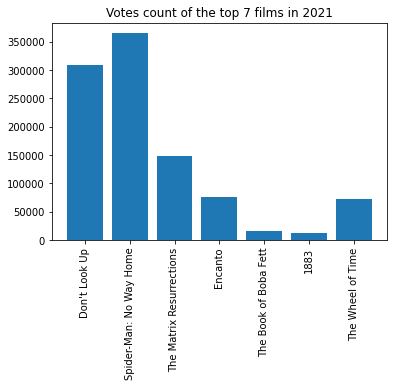

In [454]:
plt.bar(top7['Title'], top7['Votes'])
plt.title('Votes count of the top 7 films in 2021')
votesplot = plt.xticks(rotation=90)

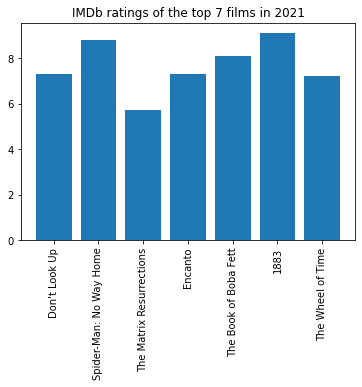

In [455]:
plt.bar(top7['Title'], top7['IMDb Rating'])
plt.title('IMDb ratings of the top 7 films in 2021')
ratingsplot = plt.xticks(rotation=90)

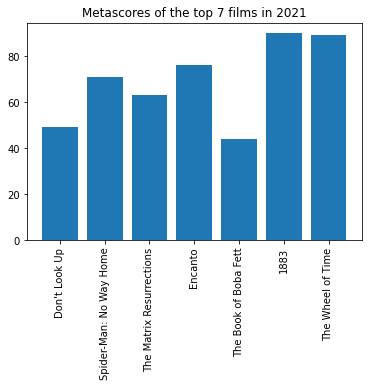

In [456]:
plt.bar(top7['Title'], top7['Metascores'])
plt.title('Metascores of the top 7 films in 2021')
metascoresplot = plt.xticks(rotation=90)

End of notebook. Please run all above.